In [55]:
## import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Read the dataset, convert it into dataframe
# columns_of_interest = ['id','title', 'text', 'label']
dataframe = pd.read_csv(r'C:\Users\NANDESHVAR\Downloads\Fake\train.csv')
dataframe.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [56]:
dataframe.shape

(20800, 5)

In [57]:
dataframe.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [58]:
dataframe.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [59]:
dataframe = dataframe.dropna()

In [13]:
dataframe.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [60]:
# merging the author name and news title
dataframe['content'] = dataframe['author']+' '+dataframe['title']

In [61]:
print(dataframe['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 18285, dtype: object


In [62]:
# separating the data & label
X = dataframe.drop(columns='label', axis=1)
Y = dataframe['label']

In [63]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [64]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
port_stem = PorterStemmer()

In [65]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [66]:
dataframe['content'] = dataframe['content'].apply(stemming)

In [67]:
print(dataframe['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 18285, dtype: object


In [68]:
#separating the data and label
X = dataframe['content'].values
Y = dataframe['label'].values

In [69]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [70]:
print(Y)

[1 0 1 ... 0 1 1]


In [71]:
Y.shape

(18285,)

In [72]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [73]:
print(X)

  (0, 14626)	0.2853880981846006
  (0, 12567)	0.25566372256502734
  (0, 8310)	0.3609049070394367
  (0, 8048)	0.29347549279156676
  (0, 7190)	0.24556189342497173
  (0, 6552)	0.21745594418933306
  (0, 4637)	0.23016077319140021
  (0, 3543)	0.2684494960336511
  (0, 3359)	0.3609049070394367
  (0, 2757)	0.2466340295002162
  (0, 2312)	0.3745612250433202
  (0, 247)	0.26982554594264346
  (1, 15663)	0.3053027963338981
  (1, 6377)	0.19285723710368197
  (1, 5140)	0.7119376870709988
  (1, 3328)	0.2623789770430963
  (1, 2619)	0.19368327535633711
  (1, 2066)	0.38191890436039194
  (1, 1764)	0.1509985164277699
  (1, 1391)	0.29617980713962144
  (2, 14560)	0.4180284001448272
  (2, 8973)	0.4948460479407663
  (2, 5579)	0.3490632212946542
  (2, 5031)	0.38709995799949964
  (2, 2895)	0.4581003415623782
  :	:
  (18282, 12239)	0.252743907968046
  (18282, 11515)	0.2748252773264482
  (18282, 11321)	0.24588400571511215
  (18282, 9605)	0.07665665104558947
  (18282, 8942)	0.1712955017712004
  (18282, 8879)	0.29296479

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [75]:
model = LogisticRegression()

In [76]:
model.fit(X_train, Y_train)

LogisticRegression()

In [77]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [78]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9901558654634947


In [79]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy_logistic = accuracy_score(X_test_prediction, Y_test)

In [80]:
print('Accuracy score of the test data : ', test_data_accuracy_logistic)

Accuracy score of the test data :  0.9827727645611156


In [81]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==3):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [82]:
print(Y_test[5])

1


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=2)

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the training data
X_train_prediction = model.predict(X_train)

# Calculate training data accuracy
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on the training data:', training_data_accuracy)

Accuracy score on the training data: 1.0


In [84]:
X_test_prediction = model.predict(X_test)

# Calculate test data accuracy
test_data_accuracy_decision_tree = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on the test data:', test_data_accuracy)

Accuracy score on the test data: 0.9934372436423298


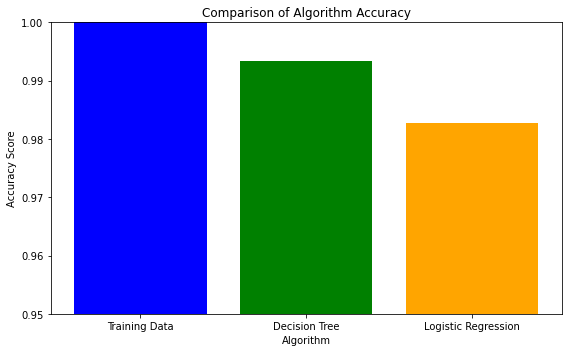

In [85]:
# Accuracy scores
accuracy_scores = [training_data_accuracy, test_data_accuracy_decision_tree, test_data_accuracy_logistic]

# Algorithm labels
algorithms = ['Training Data', 'Decision Tree', 'Logistic Regression']

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Algorithm Accuracy')
plt.ylim(0.95, 1.0)  # Set y-axis limits for better visualization
plt.tight_layout()

# Display the chart
plt.show()


In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on training data
Y_train_pred = model.predict(X_train)
# Predict on testing data
Y_test_pred = model.predict(X_test)

# Calculate accuracy
training_accuracy = accuracy_score(Y_train, Y_train_pred)
testing_accuracy = accuracy_score(Y_test, Y_test_pred)

# Calculate precision
training_precision = precision_score(Y_train, Y_train_pred)
testing_precision = precision_score(Y_test, Y_test_pred)

# Calculate recall
training_recall = recall_score(Y_train, Y_train_pred)
testing_recall = recall_score(Y_test, Y_test_pred)

# Calculate F1-score
training_f1 = f1_score(Y_train, Y_train_pred)
testing_f1 = f1_score(Y_test, Y_test_pred)

# Print the evaluation metrics
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)
print("Training Precision:", training_precision)
print("Testing Precision:", testing_precision)
print("Training Recall:", training_recall)
print("Testing Recall:", testing_recall)
print("Training F1-Score:", training_f1)
print("Testing F1-Score:", testing_f1)


Training Accuracy: 1.0
Testing Accuracy: 0.9934372436423298
Training Precision: 1.0
Testing Precision: 0.9924290220820189
Training Recall: 1.0
Testing Recall: 0.9924290220820189
Training F1-Score: 1.0
Testing F1-Score: 0.9924290220820189
